In [1]:
import tensorflow as tf
import tensorflow.keras
 
# библиотека для вывода изображений
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from livelossplot import PlotLossesKeras

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
# импорт модели
from tensorflow.keras.models import Sequential
# импорт оптимайзера
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras import metrics
from time import sleep

Загружаю датасет и привожу к удобному виду

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [6]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

Я исследую 4 разных архитектуры нейросетей

In [7]:
# Создаем модель
large_model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train[0].shape)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
]) 
old_model = Sequential([  # модель с семинара
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)
])
drop_model = Sequential([
    layers.Dropout(input_shape=(28,28), rate=0.4),
    layers.Flatten(),
    layers.Dense(48, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
small_model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(10, activation='sigmoid')
])


Summary моделей

In [8]:
large_model.summary()
old_model.summary()
drop_model.summary()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 64)            2112      
                                                                 
 dense_2 (Dense)             (None, 28, 128)           8320      
                                                                 
 dense_3 (Dense)             (None, 28, 256)           33024     
                                                                 
 dense_4 (Dense)             (None, 28, 512)           131584    
                                                                 
 flatten (Flatten)           (None, 14336)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [9]:
#Компиляция моделей

large_model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.00024),
             metrics=['categorical_accuracy'])
old_model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy'])
drop_model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy'])
small_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.00024),
    metrics=['categorical_accuracy'])


In [10]:
# тормоза
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=False, patience=6)
callback_ = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Приступим к обучению моделей

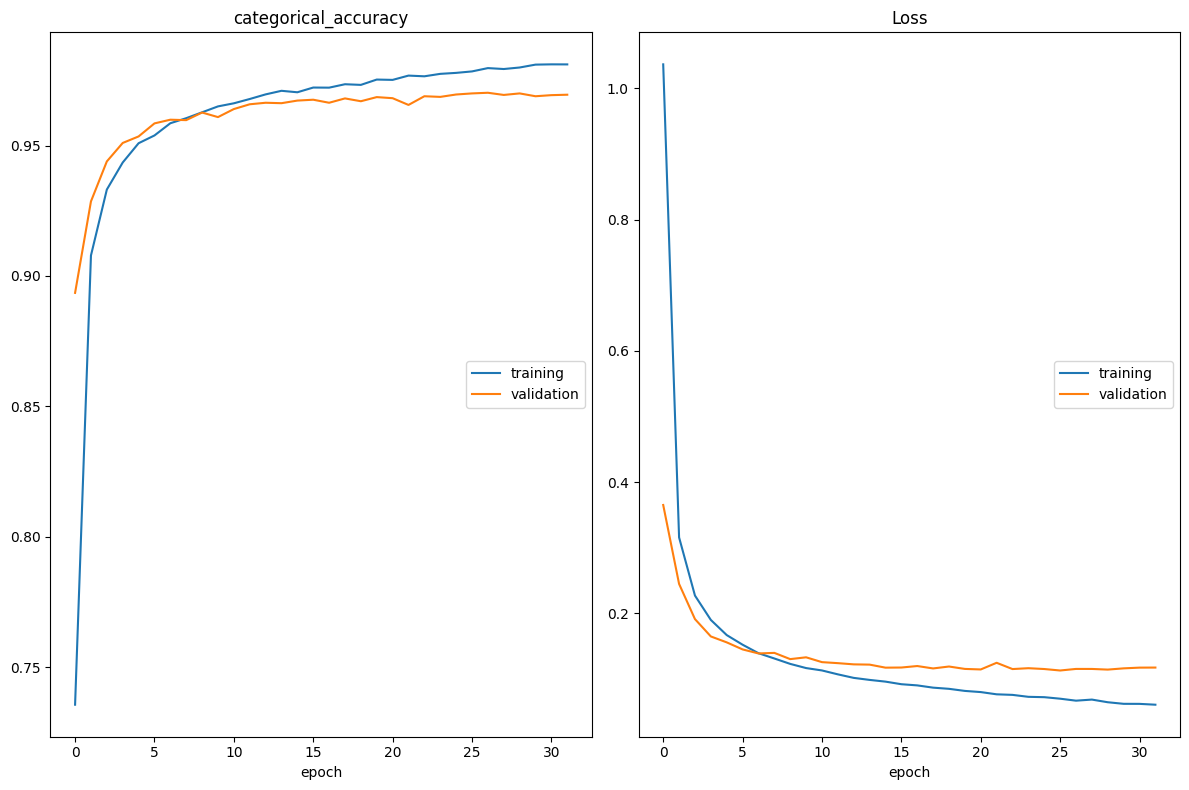

categorical_accuracy
	training         	 (min:    0.736, max:    0.981, cur:    0.981)
	validation       	 (min:    0.893, max:    0.970, cur:    0.970)
Loss
	training         	 (min:    0.061, max:    1.037, cur:    0.061)
	validation       	 (min:    0.113, max:    0.365, cur:    0.117)


In [11]:
large_hist = large_model.fit(X_train, y_train, batch_size=500, verbose=False, 
                    epochs= 50, validation_split = 0.2, callbacks=[PlotLossesKeras(), stop])

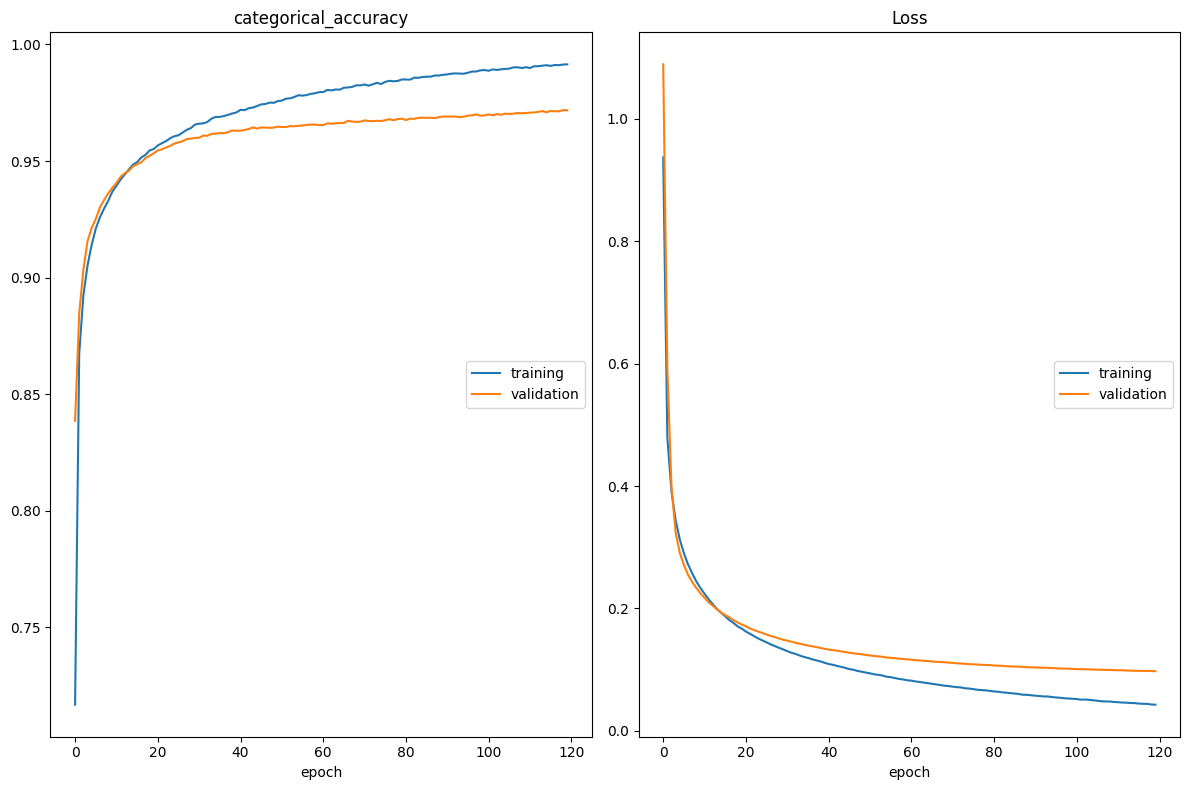

categorical_accuracy
	training         	 (min:    0.717, max:    0.991, cur:    0.991)
	validation       	 (min:    0.839, max:    0.972, cur:    0.972)
Loss
	training         	 (min:    0.043, max:    0.937, cur:    0.043)
	validation       	 (min:    0.097, max:    1.089, cur:    0.097)


In [12]:
old_hist = old_model.fit(X_train, y_train, batch_size=400, verbose=False,
              epochs=120, validation_split=0.2, callbacks=[PlotLossesKeras(), callback_])

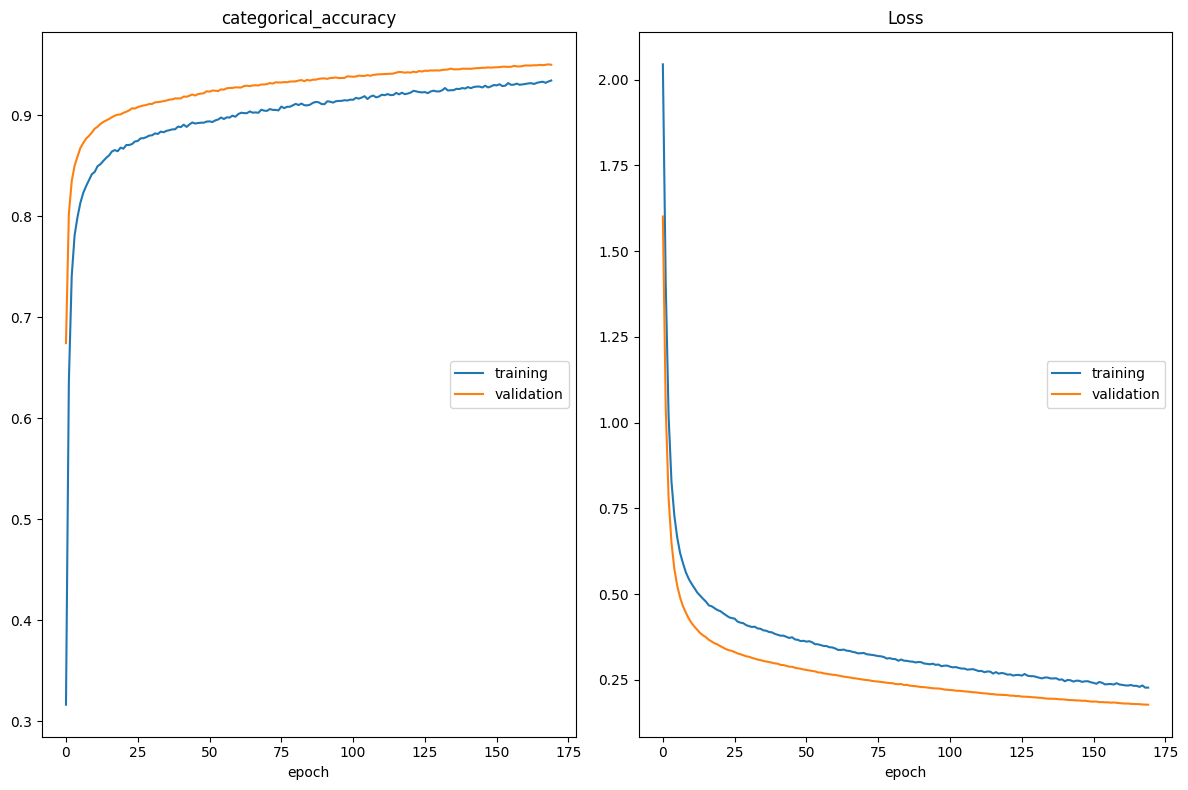

categorical_accuracy
	training         	 (min:    0.316, max:    0.934, cur:    0.934)
	validation       	 (min:    0.674, max:    0.950, cur:    0.950)
Loss
	training         	 (min:    0.228, max:    2.044, cur:    0.228)
	validation       	 (min:    0.178, max:    1.601, cur:    0.178)


In [13]:
drop_hist = drop_model.fit(X_train, y_train, batch_size=300, verbose=False,
               epochs=170, validation_split=0.3, callbacks=[PlotLossesKeras(), stop])

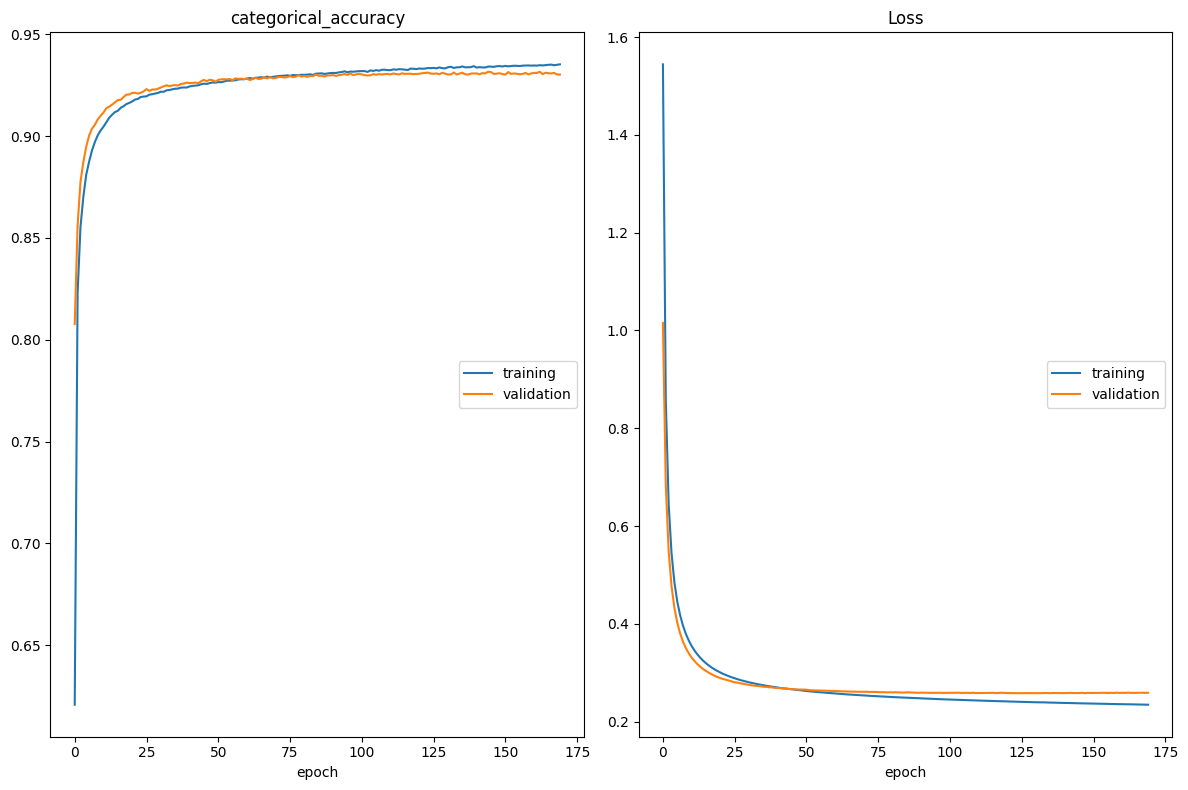

categorical_accuracy
	training         	 (min:    0.621, max:    0.935, cur:    0.935)
	validation       	 (min:    0.808, max:    0.932, cur:    0.930)
Loss
	training         	 (min:    0.235, max:    1.544, cur:    0.235)
	validation       	 (min:    0.258, max:    1.015, cur:    0.259)


In [14]:
small_hist = small_model.fit(X_train, y_train, batch_size=200, verbose=False,
                epochs=170, validation_split=0.2, callbacks=[PlotLossesKeras(), callback_])

In [16]:
#сохраняю модели
large_model.save('large_model.h5')
old_model.save('old_model.h5')
drop_model.save('drop_model.h5')
small_model.save('small_model.h5')

Выводы и отчет о рассмотренных моделях

In [27]:
# получение данных
large_pred = large_model.predict(X_test)
old_pred = old_model.predict(X_test)
drop_pred = drop_model.predict(X_test)
small_pred = small_model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


Таблица вида:

имя_модели, эксперимента номер
accuracy

precision

recall

F1

minimal validation

------------

In [52]:

s = ['large_model', 'old_model', 'drop_model', 'small_model']
s1 = [large_hist, old_hist, drop_hist, small_hist]
i = 0
for predicted in [large_pred, old_pred, drop_pred, small_pred]:
    TP = np.count_nonzero((predicted * y_test) == 0)
    TN = np.count_nonzero(((predicted - 1) * (y_test - 1)) == 0)
    FP = np.count_nonzero((predicted * (y_test - 1)) == 0)
    FN = np.count_nonzero(((predicted - 1) * y_test) == 0)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    print(str(s[i]) + ', number:', str(i + 1))
    print(f'accuracy for {s[i]}: {(TP + TN) / (TP + TN + FP + FN)}')
    print(f'precision for {s[i]}: {precision}')
    print(f'recall for {s[i]}: {recall}')
    print(f'F1 for {s[i]}: {2 * precision * recall / (precision + recall)}')
    print(f'minimal validation loss for {s[i]}: {min(s1[i].history["val_loss"])}')
    print('----------------------------------------')
    i += 1


large_model, number: 1
accuracy for large_model: 0.4981692280867811
precision for large_model: 0.9
recall for large_model: 0.49796663623537224
F1 for large_model: 0.6411740609471566
minimal validation loss for large_model: 0.11282526701688766
----------------------------------------
old_model, number: 2
accuracy for old_model: 0.5
precision for old_model: 0.9
recall for old_model: 0.5
F1 for old_model: 0.6428571428571429
minimal validation loss for old_model: 0.09738399088382721
----------------------------------------
drop_model, number: 3
accuracy for drop_model: 0.49989752100819335
precision for drop_model: 0.9
recall for drop_model: 0.4998861370465616
F1 for drop_model: 0.6427630239857736
minimal validation loss for drop_model: 0.17788369953632355
----------------------------------------
small_model, number: 4
accuracy for small_model: 0.499970001799892
precision for small_model: 0.9
recall for small_model: 0.49996666888874075
F1 for small_model: 0.642829593017442
minimal validatio

### **Вывод**

В целом модели по своим характеристикам одинаковы, однако у old_model имеется незначительное преимущество как по recall так и по минимальной ошибке по валидации. Я считаю что это связано со средней архитектурой: 2 скрытых слоя со средним количеством нейронов.

Также old_model значительно переобучилась: разрыв между тренировочной и валидационными аккуратностями составил 0.2.

Возможно, если применить dropout можно было бы избежать переобучения.